# GEOGM0058 Practical 4: Lotka-Volterra Predator Prey

In [14]:
# I am bringing in packages from the practical, not all may be used

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

## Exercise 4.3 : Predator-prey equations.

Predator-prey equations:

$$ \frac{ {\rm d} x}{ {\rm d} t } = a x - b x y$$

and

$$ \frac{ {\rm d} y}{ {\rm d} t } = c b x y - d y$$

together with initial populations $x(t = 0) = x_0$ and $y(t = 0) = y_0$.

The table below lists the parameters $a, b, c, d$.
|Parameter|Description|Unit|
|-|-|-|
|x|Prey species population density | X (e.g count per unit volume)|
|y|Predator species population density | X |
|a|Prey species growth rate. The rate of prey growth in the absence of predators. | 1/T (e/g 1/year) |
|b|Coefficient of predation. The fraction of the prey population killed by a single predator per unit time  | 1/(TX) |
|c|Predator efficiency. Predator births per prey consumed | 1 |
|d|Predator death rate | 1/T |

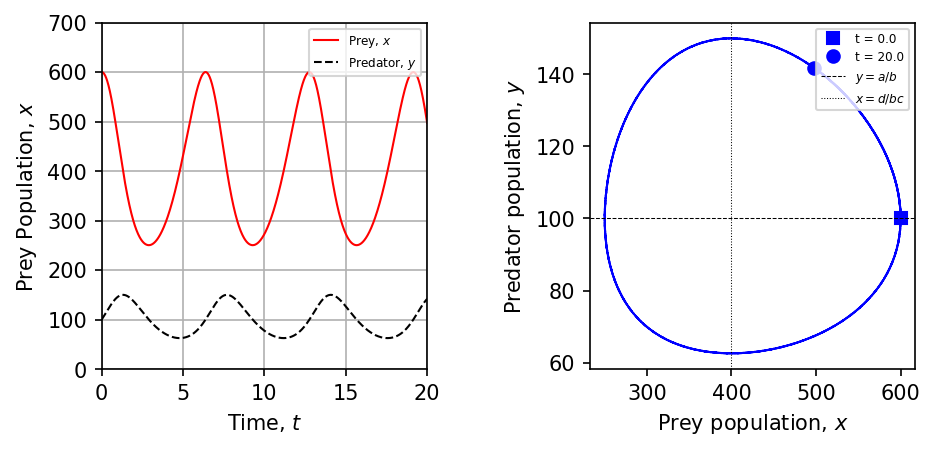

In [16]:
A = 1.0 # prey reproduction rate (birth - non-predation death)
B = 0.01 # each predator eats ? prey per unit time
C = 0.25 # predators produce ? offspring per prey eaten per unit time
D = 1.0 # death rate of predators in absence of prey

PERT_X = 200 # perturbation to initail prey population

def lv_pp_model(t_span, x_y_initial, parameters, max_step=0.02):
    """ solve the Lotka_Volterra IVP """   
    def dxdt_lv_pp(t, xv, a, b, c, d):
        """  dx/dt: Lotka-Volterra predator-prey equations """
        x, y = xv    
        dxdt = a*x - b*x*y 
        dydt = c*b*x*y - d*y
        return (dxdt, dydt)
    
    sol = scipy.integrate.solve_ivp(dxdt_lv_pp, t_span, 
                                    x_y_initial, args=parameters, max_step=max_step)
    return sol.t, sol.y[0], sol.y[1]


time_span = (0,20)
x_y_initial = (D/(C*B) + PERT_X , A/B)
param_vector = (A, B, C, D)
t, x, y = lv_pp_model(time_span, x_y_initial, param_vector)    

fig = plt.figure(figsize=(7,3), dpi = 150)

#Time series
ax_t = fig.add_subplot(1, 2, 1)
ax_t.plot(t, x, 'r-', label=r'Prey, $x$',lw=1)       

ax_t.set_xlabel(r'Time, $t$')
ax_t.set_ylabel(r'Prey Population, $x$')
ax_t.plot(t, y, 'k--', label=r'Predator, $y$',lw=1)
ax_t.legend(loc='upper right', fontsize='xx-small')
ax_t.set_ylim(0, np.max([x,y]) + 100)
ax_t.set_xlim(time_span)
ax_t.grid()

#Phase plane diagram
ax_p = fig.add_subplot(1, 2, 2)      
ax_p.plot(x, y, 'b--', lw=1)
ax_p.plot(x[0], y[0], 'bs', label=f't = {t[0]}' )
ax_p.plot(x[-1], y[-1], 'bo', label=f't = {t[-1]}') 

ax_p.set_ylabel(r'Predator population, $y$')
ax_p.set_xlabel(r'Prey population, $x$')  
ax_p.axhline(A/B, color='k',ls='--',label=r'$y = a/b$', lw=0.5)
ax_p.axvline(D/(C*B), color='k',ls=':',label=r'$x = d/bc$', lw=0.5)
ax_p.legend(loc='upper right', fontsize='xx-small')   
fig.subplots_adjust(wspace=0.5)    

a basic *ensemble* simulation:
we run the simulation repeatedy, starting from different initial conditions.

running simulation 0 of 32: (x_0, y_0) = (412.6839387887803, 100.0)
final (x,y) = (405.92229895598285, 97.25482478449177)
running simulation 1 of 32: (x_0, y_0) = (461.3344339234346, 100.0)
final (x,y) = (408.5476198857372, 86.22984911941118)
running simulation 2 of 32: (x_0, y_0) = (422.18455855756093, 100.0)
final (x,y) = (409.6150137885932, 95.18261038371266)
running simulation 3 of 32: (x_0, y_0) = (490.38221251597736, 100.0)
final (x,y) = (382.19845660725645, 80.79114384550539)
running simulation 4 of 32: (x_0, y_0) = (416.6421288523078, 100.0)
final (x,y) = (407.56946479711365, 96.39622494191147)
running simulation 5 of 32: (x_0, y_0) = (470.62994703642755, 100.0)
final (x,y) = (402.7031970336581, 84.21636674015161)
running simulation 6 of 32: (x_0, y_0) = (457.81325400745806, 100.0)
final (x,y) = (410.1234781649302, 87.02727441374084)
running simulation 7 of 32: (x_0, y_0) = (440.50481047746257, 100.0)
final (x,y) = (413.19370778249623, 91.03828868259983)
running simulation 8 of

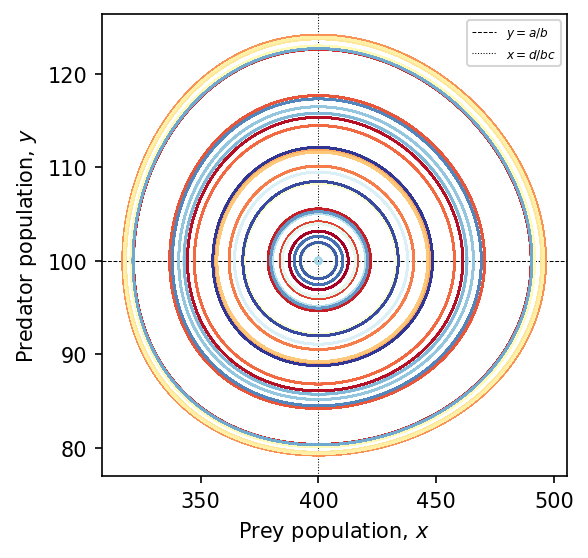

In [25]:
#redefine the coefficients
A = 1.0 # prey reproduction rate (birth - non-predation death)
B = 0.01 # each predator eats ? prey per unit time
C = 0.25 # predators produce ? offspring per prey eaten per unit time
D = 1.0 # death rate of predators in absence of prey
PERT_X = 100
PERT_Y = 0

import matplotlib as mpl


def pp_ensemble_ivp(model, time_span, param_vector, n_members, x_span, y_span, ax=None):
        
    #color map
    cmap = mpl.colormaps['RdYlBu'](np.linspace(0,1,n_members))
    # generate random initial conditions
    gen = lambda span: span[0] + np.random.rand(n_members) *(span[1] - span[0])
    x_e, y_e = gen(x_span), gen(y_span)
    
    final_x, final_y = np.empty(n_members), np.empty(n_members)
    
    
    for k, (x_0, y_0, color) in enumerate(zip(x_e, y_e, cmap)):
        print (f'running simulation {k} of {n_members}: (x_0, y_0) = {(x_0, y_0)}')
        t, x, y = model( time_span, (x_0, y_0), param_vector)
        final_x[k], final_y[k] = x[-1], y[-1]
        print (f'final (x,y) = {final_x[k], final_y[k]}')
        if (ax):
            ax.plot(x,y, color=color, lw=1)
            #ax.plot(x[0], y[0], 's', color=color, ms=3)
    
    return final_x, final_y
    
    
time_span = (0,200)


fig = plt.figure(figsize=(4,4), dpi = 150)
ax = fig.add_subplot(1, 1, 1)  
ax.set_ylabel(r'Predator population, $y$')
ax.set_xlabel(r'Prey population, $x$')  
ax.axhline(A/B, color='k',ls='--',label=r'$y = a/b$', lw=0.5)
ax.axvline(D/(C*B), color='k',ls=':',label=r'$x = d/bc$', lw=0.5)
ax.legend(loc='upper right', fontsize='xx-small')  
param_vector = (A, B, C, D)
_ = pp_ensemble_ivp(lv_pp_model,time_span, param_vector, 32, (D/(B*C),D/(B*C)+PERT_X), (A/B, A/B+PERT_Y), ax=ax)



## Fisheries
Lau parameters

natural conditions
running simulation 0 of 8: (x_0, y_0) = (182.6932263050321, 32.33259015562389)
final (x,y) = (189.34281668739143, 174.9234131320977)
running simulation 1 of 8: (x_0, y_0) = (150.7168622643554, 95.97605823635294)
final (x,y) = (186.12097187172594, 174.48460819347537)
running simulation 2 of 8: (x_0, y_0) = (151.03606045333203, 26.617644155382234)
final (x,y) = (189.5872678584094, 173.98701070991788)
running simulation 3 of 8: (x_0, y_0) = (101.6051868632161, 28.86107689137419)
final (x,y) = (188.894141786646, 172.64871543002963)
running simulation 4 of 8: (x_0, y_0) = (175.02810592575298, 33.483827564409715)
final (x,y) = (189.23517035573562, 174.82973342110137)
running simulation 5 of 8: (x_0, y_0) = (116.51275325927105, 22.75054653722585)
final (x,y) = (189.4319581053867, 172.7812178047904)
running simulation 6 of 8: (x_0, y_0) = (199.8643039955671, 46.3730155656371)
final (x,y) = (188.391756945206, 175.58089599211252)
running simulation 7 of 8: (x_0, y_0) = (182.17

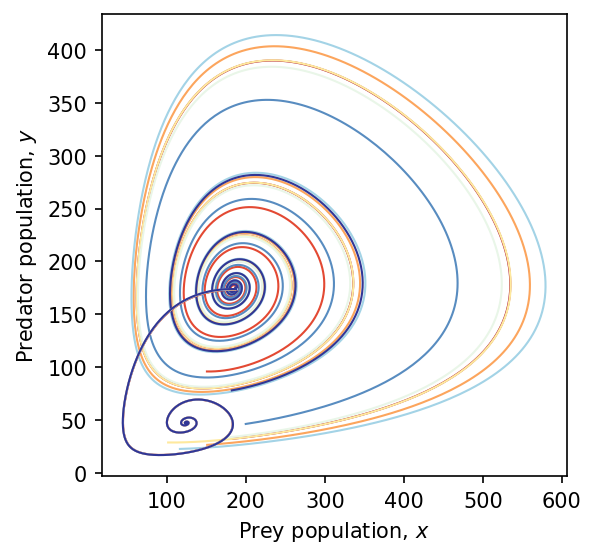

In [32]:
#Parameter sets from Lau, 2022. a and b are swapped relative to eariler
#exercises to be consistent with Lau
# a, b, c, d, h, K, m, z
STABLE = (0.01, 0.35, 0.6, 0.2, 0.44, 1900.0, 0.30, 0.0)
EXTINCTION = (0.61, 0.11, 0.8, 0.18, 0.18, 3100, 0.7, 0.0)
#CYCLES = (0.32, 0.48, 0.40, 0.16, 0.23, 2400, 0.30, 0.0) 
#CYCLES = (0.01, 0.76, 0.25, 0.5, 0.01, 5000, 0.00, 0.0)

CYCLES = (0.01, 0.35, 0.6, 0.2, 0.44, 1900.0, 0.00, 0.0)
HARVEST = 0.2

#change this between STABLE, EXTINCTION, CYCLES
param_vector = STABLE

def alt_pp_model(t_span, x_y_initial, param_vector):
    """ (Arditi and AkÃ§akaya, 1990) PP model """
    def dxdt_lv_aa(t, xv, a, b, c, d, h, K, m, z ):
        x, y = xv
        predation = a*x*y/(y**m + a*h*x)
        dxdt = b*(1-x/K)*x - predation - z*x
        dydt = c*predation - d*y
        return [dxdt, dydt]
    sol = scipy.integrate.solve_ivp(dxdt_lv_aa, t_span, x_y_initial, args=param_vector,max_step=0.1)
    return sol.t, sol.y[0], sol.y[1]
                        
fig = plt.figure(figsize=(4,4), dpi = 150)
ax = fig.add_subplot(1, 1, 1)  
ax.set_ylabel(r'Predator population, $y$')
ax.set_xlabel(r'Prey population, $x$')  


time_span = (0,200)
print ('natural conditions')
x_end, y_end = pp_ensemble_ivp(alt_pp_model,time_span, param_vector, 8, (100,200), (10,100), ax=ax)
        
time_span = (0,500)   
if HARVEST > 1.0e-10: 
    print ('harvesting begins')
    p_harvest = list(param_vector)
    p_harvest[-1] = HARVEST
    x_end2, y_end2 = pp_ensemble_ivp(alt_pp_model,time_span, p_harvest, 4, (np.min(x_end), np.max(x_end)), (np.min(y_end), np.max(y_end)), ax=ax)    
    
    

# GEOGM0058 Practical 7: Atmospheric pollution dispersal as an example of advection and diffusion processes

## Pollution function

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def stable_time_step(vx, Dx, Dz, dx, dz):
    
    dx2, dz2 = dx*dx, dz*dz
    dt_diff = dx2 * dz2 / (2 * (np.max(Dx)+np.max(Dz)) * (dx2 + dz2 ) + 1.0e-10) # stable time step. 
    dt_cfl = dx / (np.max(vx) + 1.0e-10) # advection stable step
    dt = min(dt_cfl, dt_diff)*0.5

    return dt

def euler_advection_diffusion_timestep(c0, vx, Dx, Dz, src, dt, dx, dz, inversion=False, upwind=True):
    """ 
    Evolve the advection diffusion equation for pollution concentration 
    by one time step. Spatial discretization using the finite volume method
    on a rectangular mesh of rectangular cells. Forward Euler timestep
     
    Advection is limited to wind parallel to the x-axis
    
    Note the time-step and advection schemes here are for illustration. Real
    codes use better schemes (usually :)
    
    parameters
    ----------
    c0 ((nz, nx) ndarray) : cell-centered concentration at the start of the time step
    vx ((nz, nx+1) ndarray) : horizontal wind velocity at x-faces
    Dx ((nz, nx+1) ndarray) : horizontal diffusion coeffcient at x-faces
    Dz ((nz+1, nx) ndarray) : horizontal diffusion coeffcient at z-faces
    src: concentration source per unit time
    dt (float) : timestep. not checked for stability
    
    inversion: affects the boundary condition at the top boundary: 
               when true, pollution cannot cross the inversion.
               when false, concentration set to 0 at the top
    
    upwind: choice of advection schemne. When true, first-order upwind.
    when false, central difference
    
    returns
    ------
    c (ndarray): updated concentration
    
    """
    nz, nx = c0.shape
    c = c0.copy()
    
    #storage for face-centered fluxes. index j correspomnd to 'w' face of cell j
    Fx = np.zeros((nz, nx + 1))
    Fz = np.zeros((nz +1 , nx))
    
    #Diffusive fluxes (per unit volume) 
    Fx[:, 1:nx] = - Dx[:, 1:nx] * (c[:,1:nx] - c[:,0:nx-1]) / (dx*dx)
    Fz[1:nz, :] = - Dz[1:nz, :] * (c[1:nz,:] - c[0:nz-1,:]) / (dz*dz)
    
    #Advective fluxes
    if upwind:
       Fx[:, 1:nx] += np.where(vx[:,1:nx] > 0, vx[:,1:nx] * c[:,0:nx-1], -vx[:,1:nx]*c[:,1:nx]) / dx     
    else:
       Fx[:, 1:nx] += vx[:,1:nx] * (c[:,0:nx-1] + c[:,1:nx]) * 0.5 / dx
    
                           
    c[1:nz-1, 1:nx-1] = c0[1:nz-1, 1:nx-1]  + dt * (
            - (Fx[1:nz-1, 2:nx] - Fx[1:nz-1, 1:nx-1] )
            - (Fz[2:nz, 1:nx-1] - Fz[1:nz-1, 1:nx-1] )
            +  src[1:nz-1, 1:nx-1] )
    
    #upper atmosphere boundary
    if (inversion):
        c[-1, 1:-1] = c[-2, 1:-1] 
        ...
    else:
        c[-1, 1:-1] = 0
        
    #ground boundary - no deposition
    c[0, 1:-1] = c[1, 1:-1] 
        
    #left boundary. assumes upstream!
    c[1:-1, 0] = 0
    
    #right boundary. assumes downstream!
    c[:, -1] = c[:, -2]
    
    return c

def euler_advection_diffusion(c0, vx, Dx, Dz, src, tspan, dx, dz, inversion=False, upwind=True):
    """ 
    Evolve the advection diffusion equation for pollution concentration 
    from time tspan[0] to tspan[1]. Spatial discretization using the finite volume method
    on a rectangular mesh of rectangular cells. Forward Euler timestep.
    Use as m,any timesteps as needed given stability requirements 
    
    return: c(t = tspan[1])
    """
    
    dt_stable = stable_time_step(vx, Dx, Dz, dx, dz)
    
    time = tspan[0]

    c = c0.copy()
    nstep = (tspan[1] - tspan[0]) / dt_stable
    step = 0
    while (time < tspan[1]) and (step < nstep + 1) :
        dt = min(dt_stable, tspan[1] - time)
        c = euler_advection_diffusion_timestep(c, vx, Dx, Dz, src, dt, dx, dz, inversion=inversion, upwind=upwind)
        time += dt
        step += 1
        
    if time < tspan[1]:
        print ('eee', time, tspan[1])
    return c
    
        
def transport_pollution(sim_time, dx_per_km, width_height_km, source_x_z, source_emission_rate, diffusion, wind_speed,inversion=False, upwind=True):
    """
    Simulate pollution transport from a point source
    
    """
    
    # cell dimensions in x-, z- directions, m
    dx = 1.0 / dx_per_km 
    dz = 0.1 * dx 
    
    #mesh
    nx, nz = int(width_height_km[0]/dx) + 2, int(width_height_km[1]/dz) + 2
    x = np.linspace(-dx/2, width_height_km[0] + dx/2, nx)
    z = np.linspace(-dz/2, width_height_km[1] + dz/2, nz)

    #point source position and rate of emission -. ug / m^3
    i_src, j_src = np.argmin(np.abs(z - source_x_z[1])), np.argmin(np.abs(x - source_x_z[0]))
    src = np.zeros((nz,nx))
    src[i_src, j_src] = source_emission_rate/(dx*dz*1.e+6)

    #wind speed at cell x - faces
    vx = np.zeros((nz, nx + 1)) + wind_speed
    #diffusion at cell x-faces
    Dx =  np.full((nz, nx + 1), diffusion)  
    #diffusion at cell z-faces
    Dz =  np.full((nz + 1, nx), diffusion)
    
    dt_stable = stable_time_step(vx, Dx, Dz, dx, dz)
    print (f'{sim_time} second simulation requires ~ {int(sim_time/dt_stable)} steps: stable timestep dt = {dt_stable}')

    #initial condition
    conc0 = np.zeros((nz, nx))
    
    # output evry minute of timesteps
    dt = 60
    # store concentration every minute for 60 minutes
    nstore = int(sim_time/dt)
    #progress log interval
    progress = int(nstore/10)
    
    conc_store = np.zeros((nz,nx,nstore))
    time_store = np.zeros((nstore))
    mstore = 0
    time = 0.0
    for k in range(nstore):
        tspan = (time, time + dt)
        conc = euler_advection_diffusion(conc0, vx, Dx, Dz, src, tspan, dx, dz, inversion=inversion, upwind=upwind)
        #conc = ivp_advection_diffusion(conc0, vx, Dx, Dz, src, tspan, dx, dz, inversion=inversion, upwind=upwind)
        conc0[:,:] = conc[:,:]
        time += dt
        conc_store[:,:,k] = conc[:,:]
        time_store[k] = time
        if (k%progress == 0):
            print (f'progress: time = {time} / {sim_time}')
    print (f'{sim_time} second simulation complete')                    
    return x, z, time_store, conc_store                          
    
def plot_pollution(x, z, time, conc , source_x_z):
    nx = x.shape[0]
    nz = z.shape[0]
    nt = time.shape[0]
    
    dz, dx = z[1] - z[0], x[1] - x[0]
    i_src, j_src = np.argmin(np.abs(z - source_x_z[1])), np.argmin(np.abs(x - source_x_z[0]))
    
    fig = plt.figure(figsize=(12,6))
    m_map = [0, int(nt/2), nt-1]
    for p, m in enumerate(m_map):
        ax = fig.add_subplot(2,3,p+1)
        im = ax.pcolormesh(x[1:nx-1], z[1:nz-1],  conc[1:nz-1,1:nx-1,m], cmap='hot_r', vmin=0, vmax=10)
        if (p == 0):
            ax.set_ylabel('z (km)')
        else:
            ax.set_yticks([])
        ax.set_xlabel('x (km)')
        ax.text(0.9*np.max(x), 0.9*np.max(z), f't = {time[m]:.1f} s', horizontalalignment='right')    
    
    fig.subplots_adjust(right=0.85, wspace=0.2, hspace=0.25)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    fig.colorbar(im, cax=cbar_ax, label='$C$ ($\mu$ g / m$^3$)')

    ax = fig.add_subplot(2,2,3)
    nx4 = int(nx/4)
    for ix in [1, nx4, 2*nx4, 3*nx4, nx-2]:
        ax.plot(time, conc[1,ix,:], 'o-', ms=2,  label = f'x = {x[ix]:2.2f} km',lw=1)
        ax.legend(fontsize='xx-small', loc = 'upper right')
        ax.set_xlabel(r'time, $t$ (s)')
        ax.set_ylabel(r'Ground $C$ ($\mu$ g / m$^3$)')
    
    ax = fig.add_subplot(2,2,4)
    nt4 = int(nt/4)
    for it in [0, nt4, 2*nt4, 3*nt4, nt-1]:
        ax.plot(x, conc[1,:,it], 'o-', ms=2,   label = f't = {time[it]:2.2f} s',lw=1)
        ax.legend(fontsize='xx-small', loc = 'upper right')
        
        #label the stack
        ax.axvline(x[j_src]-dx/2., lw=0.5, color='k')
        ax.axvline(x[j_src]+dx/2., lw=0.5, color='k')
        ax.arrow(x[j_src]+2.5*dx, 0.9*np.max(conc), -2.0*dx, 0., length_includes_head=True)
        #ax.arrow(x[j_src]-4.5*dx, 0.9*np.max(conc), 4.0*dx, 0., length_includes_head=True, head_width=10)
        ax.text(x[j_src]+3.0*dx, 0.9*np.max(conc),'source cell', verticalalignment='center')
        
        
        ax.set_xlabel(r'$x$ (km)')
        ax.set_ylabel(r'Ground $\mu$ g / m$^3$)')

<>:193: SyntaxWarning: invalid escape sequence '\m'
<>:193: SyntaxWarning: invalid escape sequence '\m'
C:\Users\we24270\AppData\Local\Temp\ipykernel_17056\2857573131.py:193: SyntaxWarning: invalid escape sequence '\m'
  fig.colorbar(im, cax=cbar_ax, label='$C$ ($\mu$ g / m$^3$)')


C:\Users\we24270\OneDrive - University of Bristol\Documents\2. Course (EMDA)\4. TB1\1. GEOGM0058\3. Assessment [wc 9-Dec]\5. Code\pollution.py:193: SyntaxWarning: invalid escape sequence '\m'
  fig.colorbar(im, cax=cbar_ax, label='$C$ ($\mu$ g / m$^3$)')


3600 second simulation requires ~ 3636 steps: stable timestep dt = 0.9900867563520258
progress: time = 60.0 / 3600
progress: time = 420.0 / 3600
progress: time = 780.0 / 3600
progress: time = 1140.0 / 3600
progress: time = 1500.0 / 3600
progress: time = 1860.0 / 3600
progress: time = 2220.0 / 3600
progress: time = 2580.0 / 3600
progress: time = 2940.0 / 3600
progress: time = 3300.0 / 3600
3600 second simulation complete
plotting output...


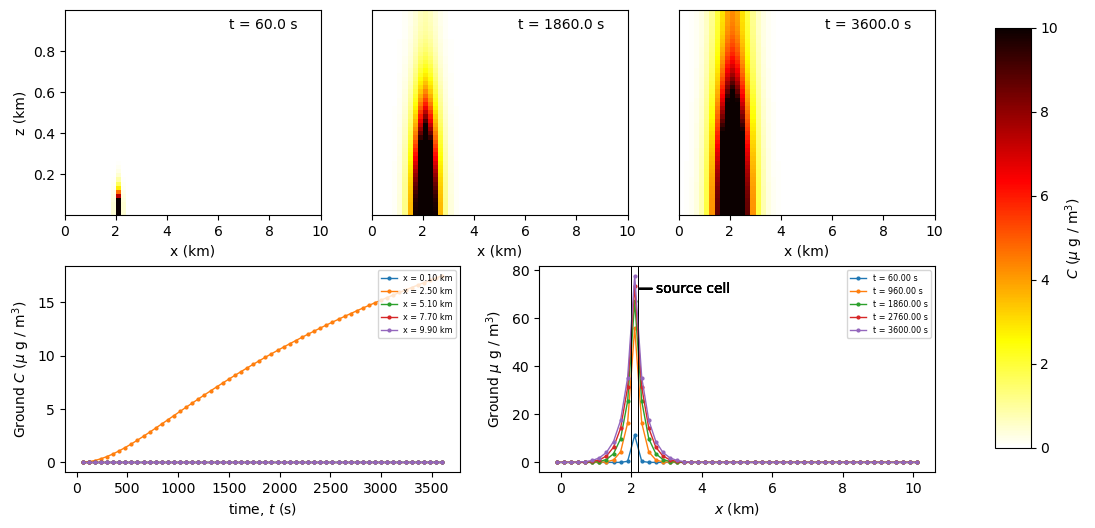

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from pollution import transport_pollution, plot_pollution

# Turbulent diffusion coefficient (km^2 / s)
D = 50.0 * 1.0e-6
#wind speed (km / sec)
U = 0.0 * 1.0e-3
#mesh resolution (10 x resolution in z)
dx_per_km = 5
#modelled region (km)
width_height_km = (10.0, 1.0)
#location of pollution source (km from domain west/low point)
stack_x_z = (2.0, 0.05) 
#rate ot emission from stack (micrograms / second)
stack_emission = 5.0e+3

#total time for simulation
sim_time = 3600

x, z, time, conc = transport_pollution(sim_time, dx_per_km, width_height_km, stack_x_z, stack_emission, D, U, inversion=True)
print('plotting output...')
plot_pollution(x, z, time, conc, stack_x_z)
